# Split for final validation

In [5]:
import os
import shutil
from pathlib import Path

# dossier d'entrée et sortie
src_dir = Path("/home/tibia/Projet_Hemorragie/MBH_Val")
dst_dir = Path("/home/tibia/Projet_Hemorragie/MBH_v2_val_1")

img_dir = dst_dir / "img"
seg_dir = dst_dir / "seg"

# création des dossiers de sortie
img_dir.mkdir(parents=True, exist_ok=True)
seg_dir.mkdir(parents=True, exist_ok=True)

# boucle patient
for case_dir in src_dir.iterdir():
    #print(case_dir.name)
    if not case_dir.is_dir():
        continue

    # identifiant = nom du dossier
    case_id = case_dir.name

    # fichiers source
    img_file = case_dir / "image.nii.gz"
    seg_file = case_dir / "label_annot_1.nii.gz"

    # fichiers destination
    dst_img = img_dir / f"{case_id}.nii.gz"
    dst_seg = seg_dir / f"{case_id}.nii.gz"

    if not img_file.exists() or not seg_file.exists():
        print(f" Missing files for {case_id}, skipping.")
        continue

    # copie
    shutil.copy(img_file, dst_img)
    shutil.copy(seg_file, dst_seg)

    print(f"✅ Processed {case_id}")

✅ Processed ID_0219ef88_ID_e5c1a31210
✅ Processed ID_066b1fc2_ID_f937d7bff0
✅ Processed ID_095c522a_ID_19cfefdccb
✅ Processed ID_0a040036_ID_44cc017f8a
✅ Processed ID_0a0e8fbe_ID_7f6c5ed050
✅ Processed ID_0bee00a2_ID_0b9e78b135
✅ Processed ID_0c45b337_ID_8fd676c7ac
✅ Processed ID_0cdd2365_ID_bcc6fbef0d
✅ Processed ID_0d0f361b_ID_17542973dc
✅ Processed ID_0df4e645_ID_d14c8c9b99
✅ Processed ID_0e8ba35b_ID_d60ed297ea
✅ Processed ID_0f320c56_ID_27f2bce652
✅ Processed ID_0faab8a8_ID_df9d49e5e6
✅ Processed ID_0fb0d3d2_ID_6270e85cb5
✅ Processed ID_0ff437c4_ID_0c9a06814c
✅ Processed ID_1aff4c26_ID_94bbe7f6cc
✅ Processed ID_1b5a3933_ID_856868cbfd
✅ Processed ID_1b5cfeda_ID_6e06ec9a1f
✅ Processed ID_1bd90426_ID_44493c1d26
✅ Processed ID_1c3da1cd_ID_cbb8a2936b
✅ Processed ID_1dfa5b21_ID_02cd74218f
✅ Processed ID_1ea1a5cd_ID_f7ffcd3292
✅ Processed ID_1ea8a377_ID_38c12664cf
✅ Processed ID_1f2017cd_ID_bfab570858
✅ Processed ID_1fcb892c_ID_908ec8ac6e
✅ Processed ID_26aa5747_ID_da121424ef
✅ Processed 

In [10]:
path= Path("/home/tibia/Projet_Hemorragie/MBH_v2_val")
image = path / "img"
segmentation = path / "seg"
print(f"Number of images: {len(list(image.iterdir()))}")
print(f"Number of segmentations: {len(list(segmentation.iterdir()))}")

Number of images: 48
Number of segmentations: 48


In [4]:
import shutil
from pathlib import Path

# chemins sources
train_src = Path("/home/tibia/Projet_Hemorragie/MBH_SEG_2025_LLG_2025_06_12")
val_src = Path("/home/tibia/Projet_Hemorragie/MBH_v2_val")

# chemin destination
dst_root = Path("/home/tibia/Projet_Hemorragie/Split_MBH_V2")

# sous-dossiers train/val
for split, src in [("train", train_src), ("val", val_src)]:
    for sub in ["img", "seg"]:
        dst_dir = dst_root / split / sub
        dst_dir.mkdir(parents=True, exist_ok=True)

        for f in (src / sub).glob("*.nii.gz"):
            shutil.copy(f, dst_dir / f.name)

        print(f"✅ Copied {sub} for {split}")

✅ Copied img for train
✅ Copied seg for train
✅ Copied img for val
✅ Copied seg for val


In [3]:
split_2 = Path("/home/tibia/Projet_Hemorragie/Split_MBH_V2")
for split in ["train", "val"]:
    img_dir = split_2 / split / "img"
    seg_dir = split_2 / split / "seg"
    print(f"{split.capitalize()} - Number of images: {len(list(img_dir.iterdir()))}")
    print(f"{split.capitalize()} - Number of segmentations: {len(list(seg_dir.iterdir()))}")

Train - Number of images: 192
Train - Number of segmentations: 192
Val - Number of images: 48
Val - Number of segmentations: 48


### Fusion des datasets

In [9]:
import os
import shutil
from pathlib import Path

def merge_datasets(src1, src2, dest):
    """
    Fusionne deux datasets ayant la structure path/img et path/seg.
    """
    src_paths = [Path(src1), Path(src2)]
    dest_path = Path(dest)
    
    # Création de l'arborescence de destination
    for subfolder in ['img', 'seg']:
        (dest_path / subfolder).mkdir(parents=True, exist_ok=True)
    
    print(f"Début de la fusion vers : {dest}")

    for i, src in enumerate(src_paths, 1):
        print(f"Traitement du dataset {i}: {src.name}")
        
        # On parcourt les sous-dossiers img et seg
        for subfolder in ['img', 'seg']:
            current_src_dir = src / subfolder
            current_dest_dir = dest_path / subfolder
            
            if not current_src_dir.exists():
                print(f"  [Attention] Dossier {subfolder} non trouvé dans {src}")
                continue
                
            files = list(current_src_dir.glob('*'))
            for file_path in files:
                # Gestion des collisions : on ajoute le nom du dossier parent comme préfixe
                # pour garantir que les fichiers restent uniques
                new_name = f"{src.name}_{file_path.name}"
                target_file = current_dest_dir / new_name
                
                # Copie du fichier (utilise copy2 pour préserver les métadonnées)
                shutil.copy2(file_path, target_file)
        
        print(f"  -> Dataset {i} copié avec succès.")

    # Vérification finale
    nb_img = len(list((dest_path / 'img').glob('*')))
    nb_seg = len(list((dest_path / 'seg').glob('*')))
    print(f"\nFusion terminée !")
    print(f"Total images : {nb_img}")
    print(f"Total segmentations : {nb_seg}")

if __name__ == "__main__":
    # Chemins fournis
    PATH_1 = "/home/tibia/Projet_Hemorragie/MBH_v2_val_5"
    PATH_2 = "/home/tibia/Projet_Hemorragie/MBH_SEG_2025_LLG_2025_06_12"
    
    # Chemin de destination
    PATH_DEST = "/home/tibia/Projet_Hemorragie/MBH_Merged_Dataset"
    
    merge_datasets(PATH_1, PATH_2, PATH_DEST)

Début de la fusion vers : /home/tibia/Projet_Hemorragie/MBH_Merged_Dataset
Traitement du dataset 1: MBH_v2_val_5
  -> Dataset 1 copié avec succès.
Traitement du dataset 2: MBH_SEG_2025_LLG_2025_06_12
  -> Dataset 2 copié avec succès.

Fusion terminée !
Total images : 238
Total segmentations : 238


In [ ]:
import shutil
from pathlib import Path

# 1. Définition des chemins
source_base = Path("/home/tibia/Projet_Hemorragie/Split_MBH_V2")
target_base = Path("/home/tibia/Projet_Hemorragie/Dataset_Global") # Nouveau dossier fusionné

# Création des dossiers de destination s'ils n'existent pas
target_img = target_base / "img"
target_seg = target_base / "seg"
target_img.mkdir(parents=True, exist_ok=True)
target_seg.mkdir(parents=True, exist_ok=True)

splits = ["train", "val"]
data_types = ["img", "seg"]

print(f"Début de la fusion de {source_base} vers {target_base}...\n")

total_moved = 0
collisions = 0

# 2. Boucle sur les splits (train/val)
for split in splits:
    print(f"--- Traitement du dossier : {split} ---")
    
    for dtype in data_types:
        # Source : Split_MBH_V2/train/img par exemple
        src_dir = source_base / split / dtype
        # Destination : Dataset_Global/img
        dst_dir = target_base / dtype
        
        # Vérification si le dossier source existe
        if not src_dir.exists():
            print(f"⚠️ Attention : Le dossier {src_dir} n'existe pas, on passe.")
            continue

        files = list(src_dir.iterdir())
        
        for file_path in files:
            if file_path.is_file():
                dest_file = dst_dir / file_path.name
                
                # Sécurité : Vérifier si le fichier existe déjà dans la destination
                if dest_file.exists():
                    print(f" Doublon détecté : {file_path.name} existe déjà dans {dtype}. Fichier ignoré.")
                    collisions += 1
                else:
                    # Copie du fichier (copy2 préserve les métadonnées)
                    shutil.copy2(file_path, dest_file)
                    total_moved += 1

print("-" * 30)
print(" Fusion terminée !")
print(f" Total fichiers copiés : {total_moved}")
if collisions > 0:
    print(f" Nombre de conflits de noms (non copiés) : {collisions}")

# 3. Vérification finale
print("\nÉtat du nouveau dataset fusionné :")
print(f"Images : {len(list(target_img.iterdir()))}")
print(f"Segmentations : {len(list(target_seg.iterdir()))}")

🔄 Début de la fusion de /home/tibia/Projet_Hemorragie/Split_MBH_V2 vers /home/tibia/Projet_Hemorragie/Dataset_Global...

--- Traitement du dossier : train ---
--- Traitement du dossier : val ---
------------------------------
✅ Fusion terminée !
📂 Total fichiers copiés : 480

📊 État du nouveau dataset fusionné :
Images : 240
Segmentations : 240


{1: 'EDH (Epidural)', 2: 'IPH (Intraparenchymal)', 3: 'IVH (Intraventricular)', 4: 'SAH (Subarachnoid)', 5: 'SDH (Subdural)'}
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
 Analyse de 238 fichiers de segmentation en cours...


100%|██████████| 238/238 [01:35<00:00,  2.49it/s]


📊 RÉSULTATS DE LA DISTRIBUTION
Nombre total d'images scannées : 238
Images sans hémorragie (Background seul) : 9
------------------------------
Classe 1 - EDH (Epidural)       : 19 images (7.98%)
Classe 2 - IPH (Intraparenchymal) : 146 images (61.34%)
Classe 3 - IVH (Intraventricular) : 137 images (57.56%)
Classe 4 - SAH (Subarachnoid)   : 126 images (52.94%)
Classe 5 - SDH (Subdural)       : 107 images (44.96%)


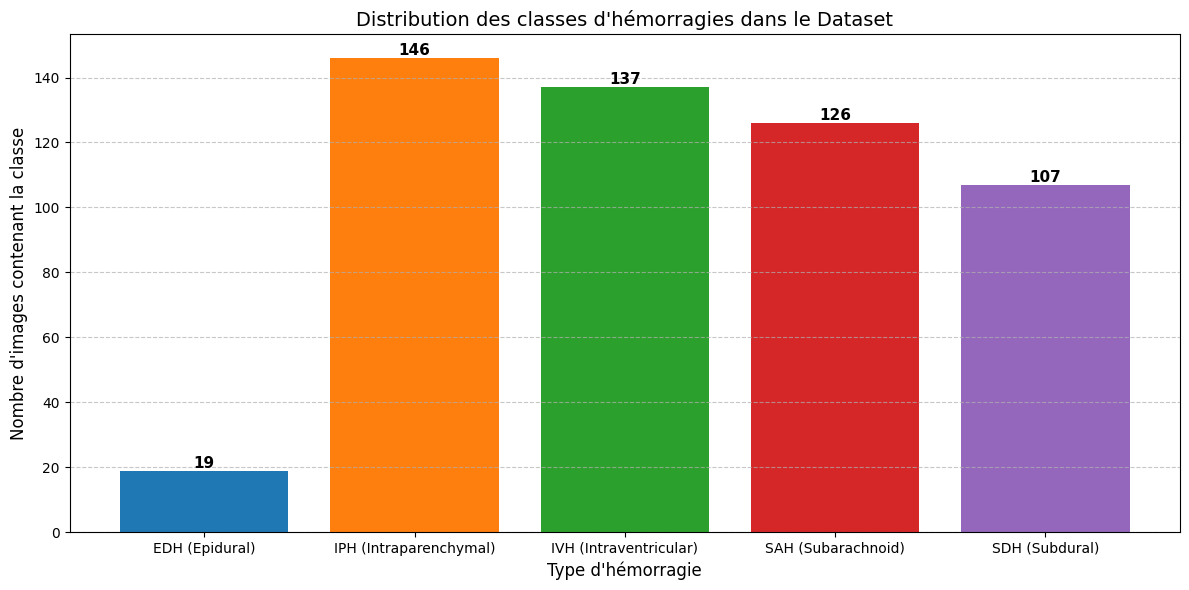

In [11]:

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm  
full_dataset = Path("/home/tibia/Projet_Hemorragie/MBH_Merged_Dataset")
#seg_path = Path("/home/tibia/Projet_Hemorragie/Dataset_Global/seg")
#seg_path= Path("/home/tibia/Projet_Hemorragie/MBH_SEG_2025_LLG_2025_06_12/seg")
seg_path = Path("/home/tibia/Projet_Hemorragie/MBH_Merged_Dataset/seg")

# Mapping des valeurs selon ta description
class_map = {
    1: "EDH (Epidural)",
    2: "IPH (Intraparenchymal)",
    3: "IVH (Intraventricular)",
    4: "SAH (Subarachnoid)",
    5: "SDH (Subdural)"
}
print (class_map)


# Initialisation des compteurs
counts = {k: 0 for k in class_map.keys()}
print (counts)
total_images = 0
images_without_hemorrhage = 0

# Récupération des fichiers (compatible .nii et .nii.gz)
seg_files = list(seg_path.glob("*.nii*"))

print(f" Analyse de {len(seg_files)} fichiers de segmentation en cours...")


for file_path in tqdm(seg_files):
    try:
        # Chargement de l'image
        img = nib.load(file_path)
        # Récupération des données sous forme de tableau numpy
        data = img.get_fdata()
        
        # np.unique renvoie les valeurs uniques triées présentes dans l'image
        # On cast en int pour être sûr (get_fdata renvoie souvent des floats)
        unique_vals = np.unique(data.astype(int))
        
        has_hemorrhage = False
        
        for val in unique_vals:
            if val in counts:
                counts[val] += 1
                has_hemorrhage = True
            elif val != 0:
                print(f"Valeur inconnue détectée : {val} dans le fichier {file_path.name}")

        if not has_hemorrhage:
            images_without_hemorrhage += 1
            
        total_images += 1

    except Exception as e:
        print(f" Erreur sur le fichier {file_path.name}: {e}")

# 3. Préparation des données pour le graphe
labels = [class_map[k] for k in counts.keys()]
values = [counts[k] for k in counts.keys()]

# Affichage des résultats textuels
print("\n" + "="*30)
print("📊 RÉSULTATS DE LA DISTRIBUTION")
print("="*30)
print(f"Nombre total d'images scannées : {total_images}")
print(f"Images sans hémorragie (Background seul) : {images_without_hemorrhage}")
print("-" * 30)
for k, v in counts.items():
    percentage = (v / total_images) * 100
    print(f"Classe {k} - {class_map[k]:<20} : {v} images ({percentage:.2f}%)")

# 4. Génération du graphique
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Ajout des titres et labels
plt.title('Distribution des classes d\'hémorragies dans le Dataset', fontsize=14)
plt.ylabel('Nombre d\'images contenant la classe', fontsize=12)
plt.xlabel('Type d\'hémorragie', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout des valeurs exactes au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show() # Affiche le graphe

In [12]:
import nibabel as nib
import numpy as np
from pathlib import Path
from tqdm import tqdm

# Chemin vers tes segmentations
#seg_path = Path("/home/tibia/Projet_Hemorragie/Dataset_Global/seg")
#seg_path = Path("/home/tibia/Projet_Hemorragie/Split_MBH_V2/train/seg")
#seg_path = Path("/home/tibia/Projet_Hemorragie/Split_MBH_V2/val/seg")
seg_path = Path("/home/tibia/Projet_Hemorragie/MBH_Merged_Dataset/seg")
seg_files = list(seg_path.glob("*.nii*"))

suspicious_files = []

print(f"🕵️  Investigation sur les fichiers vides parmi {len(seg_files)} masques...\n")

for file_path in tqdm(seg_files):
    try:
        img = nib.load(file_path)
        # On récupère les données BRUTES (sans forcer la conversion en int tout de suite)
        data = img.get_fdata()
        
        # On regarde les valeurs uniques brutes
        unique_vals_raw = np.unique(data)
        
        # Si le max est 0, c'est que l'image est vraiment toute noire
        if np.max(data) == 0:
            suspicious_files.append({
                "name": file_path.name,
                "reason": "VIDE (Tout est à 0)",
                "values": unique_vals_raw
            })
        
        # Cas subtil : Pas vide, mais valeurs très faibles (ex: 0.01) qui deviendraient 0 en int
        elif np.max(data) < 0.9: 
            suspicious_files.append({
                "name": file_path.name,
                "reason": "VALEURS FAIBLES (< 0.9)",
                "values": unique_vals_raw
            })
            
        # Cas subtil : Seulement du background (0) et peut-être une valeur inconnue
        # On vérifie si après arrondi, on a que des 0
        elif np.all(np.round(data) == 0):
             suspicious_files.append({
                "name": file_path.name,
                "reason": "VIDE APRÈS ARRONDI",
                "values": unique_vals_raw
            })

    except Exception as e:
        print(f"Erreur lecture {file_path.name}: {e}")

# --- Rapport ---
print("\n" + "="*40)
print(f" RAPPORT D'ANOMALIES : {len(suspicious_files)} fichiers trouvés")
print("="*40)

for item in suspicious_files:
    print(f" Fichier : {item['name']}")
    # print(f"   ↳ Problème : {item['reason']}")
    # print(f"   ↳ Valeurs uniques trouvées : {item['values']}")
    # print("-" * 20)

if len(suspicious_files) == 0:
    print(" Aucun fichier purement vide n'a été trouvé avec cette méthode plus fine.")

🕵️  Investigation sur les fichiers vides parmi 238 masques...



100%|██████████| 238/238 [01:39<00:00,  2.38it/s]


 RAPPORT D'ANOMALIES : 9 fichiers trouvés
 Fichier : MBH_v2_val_5_ID_0a0e8fbe_ID_7f6c5ed050.nii.gz
 Fichier : MBH_v2_val_5_ID_1ea1a5cd_ID_f7ffcd3292.nii.gz
 Fichier : MBH_v2_val_5_ID_2a712323_ID_7ef0ade00a.nii.gz
 Fichier : MBH_v2_val_5_ID_4c27e050_ID_4148891184.nii.gz
 Fichier : MBH_v2_val_5_ID_7b1f4a51_ID_0b4e0df673.nii.gz
 Fichier : MBH_v2_val_5_ID_fd77bee7_ID_60083050a8.nii.gz
 Fichier : MBH_SEG_2025_LLG_2025_06_12_ID_8d914da6_ID_b4eb9c8234.nii.gz
 Fichier : MBH_SEG_2025_LLG_2025_06_12_ID_6caf8d60_ID_3634a47122.nii.gz
 Fichier : MBH_SEG_2025_LLG_2025_06_12_ID_d039497d_ID_da6cc2290f.nii.gz


### inspection float/ int masques

In [8]:
import nibabel as nib
import numpy as np
from pathlib import Path
from tqdm import tqdm

# --- CONFIGURATION ---
# Mets ici le chemin du dossier que tu veux vérifier (celui qui pose problème)
seg_path = Path("/home/tibia/Projet_Hemorragie/MBH_v2_train/seg")

# --- SCRIPT ---
print(f"🕵️‍♂️  Audit des types de données dans : {seg_path}")

float_files = []
total_files = 0

files = list(seg_path.glob("*.nii*"))

for file_path in tqdm(files, desc="Analyse en cours"):
    try:
        img = nib.load(file_path)
        
        # ATTENTION : On ne regarde pas get_fdata() car il convertit tout en float par défaut.
        # On regarde le "dtype" déclaré dans le HEADER du fichier (comment c'est stocké sur le disque).
        dtype = img.header.get_data_dtype()
        
        # Vérifie si le type de données est une variante de float (float32, float64, etc.)
        if np.issubdtype(dtype, np.floating):
            
            # On va un peu plus loin pour voir si c'est des "faux floats" (1.0, 2.0) ou des "sales" (0.99, 1.02)
            # On charge les données brutes sans cast automatique
            raw_data = np.array(img.dataobj)
            unique_vals = np.unique(raw_data)
            
            # Est-ce que ce sont seulement des entiers stockés en float ?
            is_clean_int = np.all(np.equal(np.mod(unique_vals, 1), 0))
            
            float_files.append({
                "name": file_path.name,
                "dtype": dtype,
                "clean": is_clean_int,
                "values": unique_vals[:10] # On montre les 10 premières valeurs uniques pour info
            })
            
        total_files += 1

    except Exception as e:
        print(f"❌ Erreur lecture {file_path.name}: {e}")

# --- RAPPORT ---
print("\n" + "="*50)
print(f"📊 RAPPORT D'AUDIT")
print("="*50)
print(f"Total fichiers scannés : {total_files}")
print(f"Fichiers détectés en FLOAT : {len(float_files)}")

if len(float_files) > 0:
    print(f"Pourcentage : {(len(float_files)/total_files)*100:.2f}%")
    print("-" * 50)
    print("🔻 LISTE DES FICHIERS COUPABLES :")
    for item in float_files:
        clean_status = "✅ (Valeurs propres: 1.0, 2.0...)" if item['clean'] else "⚠️ (Valeurs sales: 0.99, 1.02...)"
        print(f"📁 {item['name']}")
        print(f"   ↳ Type: {item['dtype']}")
        print(f"   ↳ État: {clean_status}")
        print(f"   ↳ Aperçu valeurs: {item['values']}")
        print("-" * 20)
else:
    print("✅ Tout est propre ! Aucun fichier float détecté.")

🕵️‍♂️  Audit des types de données dans : /home/tibia/Projet_Hemorragie/MBH_v2_train/seg


Analyse en cours: 100%|██████████| 193/193 [00:38<00:00,  5.03it/s]


📊 RAPPORT D'AUDIT
Total fichiers scannés : 193
Fichiers détectés en FLOAT : 75
Pourcentage : 38.86%
--------------------------------------------------
🔻 LISTE DES FICHIERS COUPABLES :
📁 ID_fcbe7eda_ID_5726e1c630.nii.gz
   ↳ Type: float64
   ↳ État: ✅ (Valeurs propres: 1.0, 2.0...)
   ↳ Aperçu valeurs: [0. 4. 5.]
--------------------
📁 ID_e8691c40_ID_4e6812b21a.nii.gz
   ↳ Type: float64
   ↳ État: ✅ (Valeurs propres: 1.0, 2.0...)
   ↳ Aperçu valeurs: [0. 2.]
--------------------
📁 ID_a9b3fedc_ID_3850bef0a3.nii.gz
   ↳ Type: float64
   ↳ État: ✅ (Valeurs propres: 1.0, 2.0...)
   ↳ Aperçu valeurs: [0. 2. 3. 4.]
--------------------
📁 ID_f1a342da_ID_13d6f969d2.nii.gz
   ↳ Type: float64
   ↳ État: ✅ (Valeurs propres: 1.0, 2.0...)
   ↳ Aperçu valeurs: [0. 4.]
--------------------
📁 ID_eb39f236_ID_d7edccdb08.nii.gz
   ↳ Type: float64
   ↳ État: ✅ (Valeurs propres: 1.0, 2.0...)
   ↳ Aperçu valeurs: [0. 3. 4.]
--------------------
📁 ID_e3db11e0_ID_1863688c5b.nii.gz
   ↳ Type: float64
   ↳ État

In [7]:
import os

data_dir= "/home/tibia/Projet_Hemorragie/MBH_train"

print (f"lenght of data dir : {len(os.listdir(data_dir))}")


data_pairs = []
#     # Liste tous les sous-dossiers (chaque dossier correspond à un patient/cas)
patient_dirs = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print (f"lenght of patient dirs : {len(patient_dirs)}")
print (f"patient dirs : {patient_dirs}")

for patient_dir in patient_dirs:
    image_file = os.path.join(patient_dir, 'image.nii.gz')
        
#         # S'assure que le fichier image existe avant de continuer
    if os.path.exists(image_file):
#             # Trouve tous les fichiers d'annotation dans le dossier du patient
        label_files = [
                 os.path.join(patient_dir, f) 
                 for f in os.listdir(patient_dir) 
              if f.startswith('label_annot_') and f.endswith('.nii.gz')
             ]
        #print (f"label files : {label_files}")
        
        # # ajouter annoration random:
        # if label_files:
        #     import random
        #     selected_label = random.choice(label_files)
        #     data_pairs.append({"image": image_file, "seg": selected_label})
        #     print (f"selected label : {selected_label}")
            
#             # Crée une paire {"image": ..., "seg": ...} pour chaque label trouvé
        for label_file in label_files:
                data_pairs.append({"image": image_file, "seg": label_file})
print (f"exemple data pairs : {data_pairs[0:5]}")
        

print(f"Total data pairs found: {len(data_pairs)}")

lenght of data dir : 192
lenght of patient dirs : 192
patient dirs : ['/home/tibia/Projet_Hemorragie/MBH_train/ID_fcbe7eda_ID_5726e1c630', '/home/tibia/Projet_Hemorragie/MBH_train/ID_f335b6db_ID_d180629430', '/home/tibia/Projet_Hemorragie/MBH_train/ID_e8691c40_ID_4e6812b21a', '/home/tibia/Projet_Hemorragie/MBH_train/ID_cb4c887c_ID_ec2a4643f3', '/home/tibia/Projet_Hemorragie/MBH_train/ID_a9b3fedc_ID_3850bef0a3', '/home/tibia/Projet_Hemorragie/MBH_train/ID_98450f26_ID_8d66ffdc94', '/home/tibia/Projet_Hemorragie/MBH_train/ID_fb6d0135_ID_497840f16e', '/home/tibia/Projet_Hemorragie/MBH_train/ID_faa3c13d_ID_c31106b8dc', '/home/tibia/Projet_Hemorragie/MBH_train/ID_f4795940_ID_6317a06429', '/home/tibia/Projet_Hemorragie/MBH_train/ID_f1a342da_ID_13d6f969d2', '/home/tibia/Projet_Hemorragie/MBH_train/ID_ed6dfff7_ID_f54a5fd2c8', '/home/tibia/Projet_Hemorragie/MBH_train/ID_ec8a7bf0_ID_c853ba89ce', '/home/tibia/Projet_Hemorragie/MBH_train/ID_eb093f57_ID_0e2b33b4c9', '/home/tibia/Projet_Hemorragie/MB